In [20]:
# To create an outline for the assignment, let's first load the provided dataset to understand its structure and content.

import pandas as pd

# Load the dataset
dataset_path = 'INF2178_A4_data.csv'
data = pd.read_csv(dataset_path)

# Display basic information about the dataset and the first few rows to understand what we're working with.
data_info = data.info()
data_head = data.head()

(data_info, data_head)




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  294 non-null    int64  
 1   Subject ID  294 non-null    object 
 2   MRI ID      294 non-null    object 
 3   Group       294 non-null    object 
 4   Visit       294 non-null    int64  
 5   MR Delay    294 non-null    int64  
 6   M/F         294 non-null    object 
 7   Hand        294 non-null    object 
 8   Age         294 non-null    int64  
 9   EDUC        294 non-null    int64  
 10  SES         279 non-null    float64
 11  MMSE        293 non-null    float64
 12  CDR         294 non-null    float64
 13  eTIV        294 non-null    int64  
 14  nWBV        294 non-null    float64
 15  ASF         294 non-null    float64
dtypes: float64(5), int64(6), object(5)
memory usage: 36.9+ KB


(None,
    Unnamed: 0 Subject ID         MRI ID        Group  Visit  MR Delay M/F  \
 0           0  OAS2_0001  OAS2_0001_MR1  Nondemented      1         0   M   
 1           1  OAS2_0001  OAS2_0001_MR2  Nondemented      2       457   M   
 2           2  OAS2_0002  OAS2_0002_MR1     Demented      1         0   M   
 3           3  OAS2_0002  OAS2_0002_MR2     Demented      2       560   M   
 4           5  OAS2_0004  OAS2_0004_MR1  Nondemented      1         0   F   
 
   Hand  Age  EDUC  SES  MMSE  CDR  eTIV   nWBV    ASF  
 0    R   87    14  2.0  27.0  0.0  1987  0.696  0.883  
 1    R   88    14  2.0  30.0  0.0  2004  0.681  0.876  
 2    R   75    12  NaN  23.0  0.5  1678  0.736  1.046  
 3    R   76    12  NaN  28.0  0.5  1738  0.713  1.010  
 4    R   88    18  3.0  28.0  0.0  1215  0.710  1.444  )

<ipython-input-28-6cebb3989484>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Visit', y='nWBV', data=data, palette="vlag")


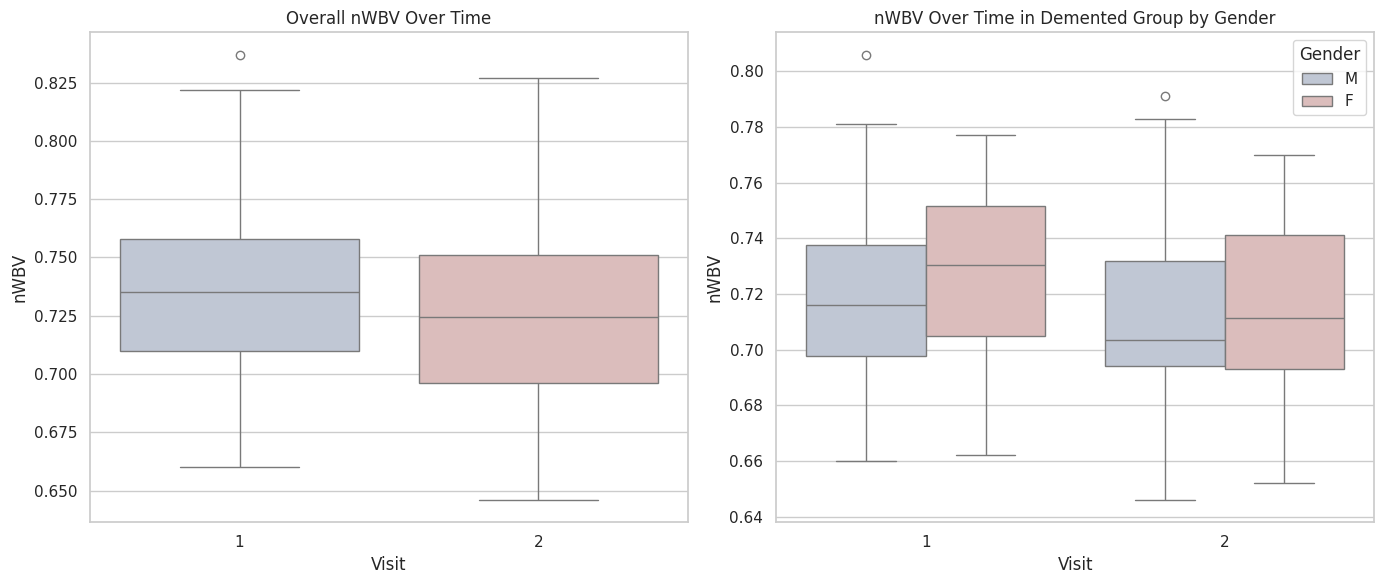

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of the visualization
sns.set(style="whitegrid")

# Let's create a boxplot to see the overall distribution of brain volumes by visit
plt.figure(figsize=(14, 6))

# Boxplot for nWBV over time for all subjects
plt.subplot(1, 2, 1)
sns.boxplot(x='Visit', y='nWBV', data=data, palette="vlag")
plt.title('Overall nWBV Over Time')

# Boxplot for nWBV over time within the Demented group
plt.subplot(1, 2, 2)
demented_data = data[data['Group'] == 'Demented']
sns.boxplot(x='Visit', y='nWBV', hue='M/F', data=demented_data, palette="vlag")
plt.title('nWBV Over Time in Demented Group by Gender')
plt.legend(title='Gender')

plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/mixed_linear_model.py:2238: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
<ipython-input-21-9958b8eb27ad>:20: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1}` instead.

  sns.pointplot(data=data, x='Visit', y='nWBV', hue='Gender', dodge=True, markers=['o', 's'], capsize=.1, errwidth=1, palette='colorblind')


                   Mixed Linear Model Regression Results
Model:                   MixedLM        Dependent Variable:        nWBV    
No. Observations:        294            Method:                    REML    
No. Groups:              150            Scale:                     0.0001  
Min. group size:         1              Log-Likelihood:            703.5023
Max. group size:         2              Converged:                 Yes     
Mean group size:         2.0                                               
---------------------------------------------------------------------------
                                Coef.  Std.Err.    z    P>|z| [0.025 0.975]
---------------------------------------------------------------------------
Intercept                        0.726    0.005 157.984 0.000  0.717  0.735
Visit[T.2]                      -0.009    0.002  -5.591 0.000 -0.012 -0.006
Gender[T.Meditation]             0.018    0.006   2.973 0.003  0.006  0.030
Visit[T.2]:Gender[T.Meditation]

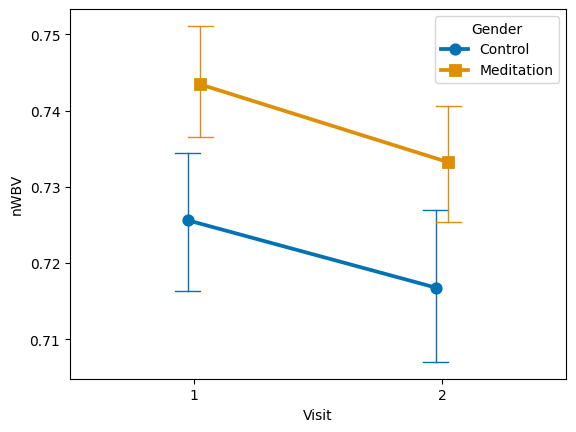

                  mean   std
Visit Gender                
1     Control     0.73  0.04
      Meditation  0.74  0.04
2     Control     0.72  0.04
      Meditation  0.73  0.04


In [21]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

# Load and prepare the dataset. Make sure 'Visit' is categorical and 'Gender' is binary or categorical.

data['Visit'] = data['Visit'].astype('category')
data['Gender'] = data['M/F'].map({'M': 'Control', 'F': 'Meditation'})  # Adapt this line based on your actual gender coding

# Define the mixed-effects model formula.
model = sm.MixedLM.from_formula("nWBV ~ Visit * Gender", data, groups=data["Subject ID"])

# Fit the model and print the summary.
result = model.fit()
print(result.summary())

# Visualization using seaborn to match the pingouin example style.
sns.pointplot(data=data, x='Visit', y='nWBV', hue='Gender', dodge=True, markers=['o', 's'], capsize=.1, errwidth=1, palette='colorblind')
plt.show()

# Group summary statistics to match the pingouin example output.
grouped_data = data.groupby(['Visit', 'Gender'])['nWBV'].agg(['mean', 'std']).round(2)
print(grouped_data)


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower  upper  reject
--------------------------------------------------
     1      2      0.0   1.0 -0.0014 0.0014  False
--------------------------------------------------


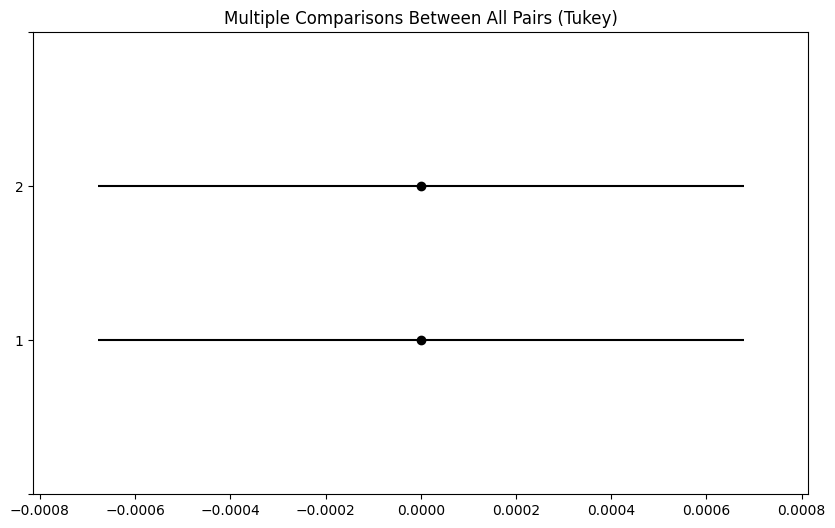

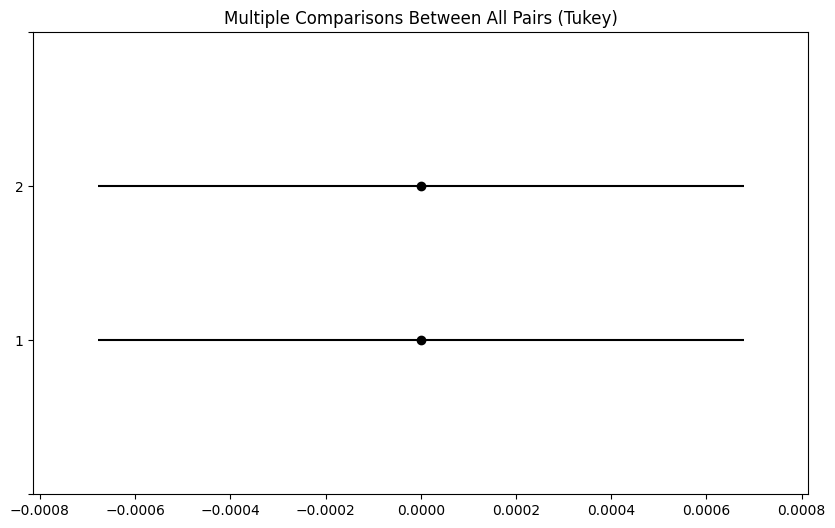

In [9]:
from statsmodels.sandbox.stats.multicomp import MultiComparison

# Assume 'result' is the fitted mixed model result from the 'statsmodels' MixedLM.

# Obtain the residuals and fitted values
residuals = result.resid
fitted = result.fittedvalues

# Conduct post-hoc pairwise comparisons for each level of 'Time' within each 'Group'
# We create a new DataFrame for post-hoc analysis
posthoc_data = pd.DataFrame({
    'Residuals': residuals,
    'Fitted': fitted,
    'Time': data['Visit'],
    'Group': data['Gender']
})

# Conduct multiple comparisons (Tukey's HSD) for the 'Time' factor within each 'Group'
multicomp = MultiComparison(posthoc_data['Residuals'], posthoc_data['Time'])  # You might need to adjust the groupings based on your actual data
tukey_result = multicomp.tukeyhsd()

# Print the results of the Tukey's HSD
print(tukey_result)

# You can also plot the results
tukey_result.plot_simultaneous()


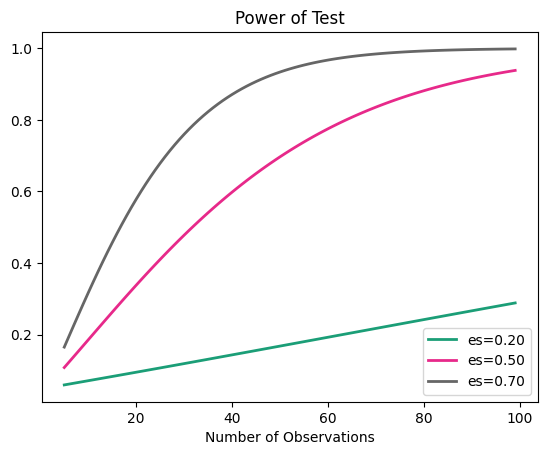

The required sample size for a t-test with power=0.91, alpha=0.05, and effect size=0.7 is: 45.45073088568012


In [25]:
from statsmodels.stats.power import TTestIndPower
import numpy as np
import matplotlib.pyplot as plt

# Parameters for power analysis
effect_size = 0.7
alpha = 0.05
power = 0.91

# Create an instance of TTestIndPower
power_analysis = TTestIndPower()

# Calculate sample size
sample_size = power_analysis.solve_power(effect_size=effect_size, power=power, alpha=alpha, ratio=1.0, alternative='two-sided')

# Plot power analysis
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
power_analysis.plot_power(dep_var='nobs', nobs=np.arange(5, 100), effect_size=np.array([0.2, 0.5, 0.7]), ax=ax)
plt.show()

# Output the sample size
print(f"The required sample size for a t-test with power={power}, alpha={alpha}, and effect size={effect_size} is: {sample_size}")


In [27]:
from scipy.stats import ttest_ind

# Parameters for the simulation
num_runs = 5000
effect_size_from_data = 0.7  # Effect size estimated from your data

# Use the sample size calculated from the earlier power analysis
sample_size = np.int64(np.ceil(sample_size))

# Function to perform a two-sample t-test on simulated data
def simulate_t_test(sample_size, effect_size):
    # Generate random data for two groups
    group1 = np.random.normal(loc=0.0, scale=1.0, size=sample_size)
    group2 = np.random.normal(loc=effect_size, scale=1.0, size=sample_size)

    # Perform the two-sample t-test
    t_stat, p_value = ttest_ind(group1, group2)
    return p_value

# Simulate the t-tests and collect p-values
p_values = [simulate_t_test(sample_size, effect_size_from_data) for _ in range(num_runs)]

# Calculate the proportion of simulations where the null hypothesis was rejected
power_estimate = np.mean(np.array(p_values) < alpha)

# Display the estimated power from the simulation
power_estimate



0.9158